In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [13]:
#Load Data and review content
cancer_data = pd.read_csv("cancer.csv")

# print("\nLoaded Data :\n------------------------------------")
# print(cancer_data.head())

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cancer_data['diagnosis'] = label_encoder.fit_transform(
                                cancer_data['diagnosis'])

#Convert input to numpy array
np_cancer = cancer_data.to_numpy()

X_data = np_cancer[:,0:30]
Y_data= np_cancer[:,30]


# print("\nFeatures before scaling :\n------------------------------------")
# print(X_data[:30,:])
# print("\nTarget before scaling :\n------------------------------------")
# print(Y_data[:30])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,2)

# print("\nFeatures after scaling :\n------------------------------------")
# print(X_data[:30,:])
# print("\nTarget after one-hot-encoding :\n------------------------------------")
# print(Y_data[:30,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.70)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)



Train Test Dimensions:
------------------------------------
(170, 30) (170, 2) (399, 30) (399, 2)


In [16]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=2

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(30,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               3968      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 2)                 258       
                                                                 
Total params: 20,738
Trainable params: 20,738
Non-trainable params: 0
_________________________________________________________________



Training Progress:
------------------------------------
Epoch 1/10
9/9 [==============================] - 1s 18ms/step - loss: 0.3521 - accuracy: 0.8529 - val_loss: 0.1564 - val_accuracy: 0.9118
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9706 - val_loss: 0.1220 - val_accuracy: 0.9118
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.9853 - val_loss: 0.1077 - val_accuracy: 0.9118
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.9412
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 0.9412
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.1173 - val_accuracy: 0.9412
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.1361

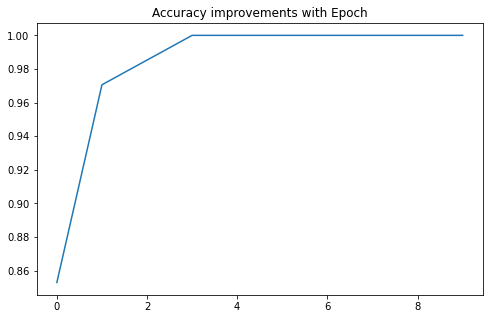


Evaluation against Test Dataset :
------------------------------------
13/13 [==============================] - 0s 1ms/step - loss: 0.1614 - accuracy: 0.9674


[0.16143204271793365, 0.9674185514450073]

In [17]:
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

In [18]:
#Saving a model
    
model.save("cancer_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("cancer_save")

#Print Model Summary

INFO:tensorflow:Assets written to: cancer_save\assets


INFO:tensorflow:Assets written to: cancer_save\assets


In [19]:
#Raw prediction data
prediction_input = [
    [9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773]
    ]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 63ms/step
Raw Prediction Output (Probabilities) : [[3.237031e-10 1.000000e+00]]
Prediction is  ['M']
